In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
data = pd.read_csv("exercise.csv")
print(data)

        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8
...         ...     ...  ...     ...     ...       ...         ...        ...
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 8 columns]


In [35]:
data1 = pd.read_csv("calories.csv")

In [36]:
data1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [22]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


In [24]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [25]:
#AGE distribution
data['Age'].value_counts()

20    512
21    497
22    489
26    452
25    435
24    426
23    411
27    396
28    390
29    379
32    370
31    339
35    327
30    325
33    320
38    311
34    285
37    283
36    279
39    276
40    260
44    259
42    257
41    252
43    250
46    233
45    233
52    225
47    223
50    220
48    219
54    217
49    208
55    204
53    201
59    198
51    197
56    190
63    182
58    182
61    181
62    180
57    177
64    176
60    172
65    169
73    167
71    163
67    162
70    154
68    150
66    147
79    147
69    145
74    142
76    139
72    137
78    133
77    130
75    117
Name: Age, dtype: int64

c:\users\karthika\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution')

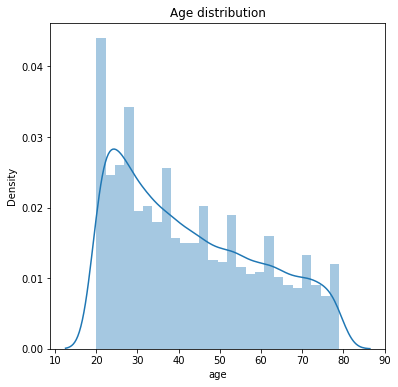

In [80]:
plt.figure(figsize=(6,6))
sns.distplot(data['Age'])
plt.xlabel("age")
plt.title("Age distribution")

In [27]:
#Height 
data['Height'].value_counts()

179.0    394
169.0    388
176.0    383
171.0    374
177.0    371
        ... 
219.0      1
126.0      1
127.0      1
222.0      1
123.0      1
Name: Height, Length: 90, dtype: int64

c:\users\karthika\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Height distribution')

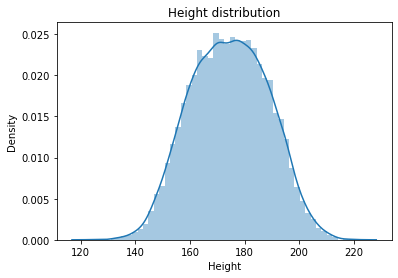

In [28]:
sns.distplot(data['Height'])
plt.title('Height distribution')

In [71]:
data.corr()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
User_ID,1.000000,0.000687,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923
Gender,0.000687,1.000000,-0.003222,-0.710534,-0.783186,-0.003440,-0.011555,-0.007264
Age,-0.001827,-0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175
Height,-0.013520,-0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200
Weight,-0.011603,-0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095
Duration,-0.002751,-0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167
Heart_Rate,-0.000457,-0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529
Body_Temp,0.000923,-0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000


<AxesSubplot:>

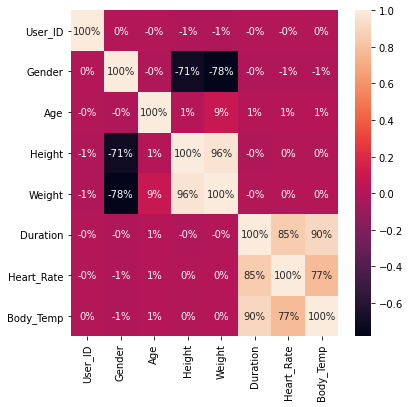

In [81]:
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(),cbar=True,annot=True,fmt=".0%")

In [29]:
#weight distribution
data['Weight'].value_counts()

66.0     374
67.0     370
63.0     361
61.0     360
68.0     359
        ... 
132.0      1
122.0      1
128.0      1
36.0       1
123.0      1
Name: Weight, Length: 91, dtype: int64

c:\users\karthika\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

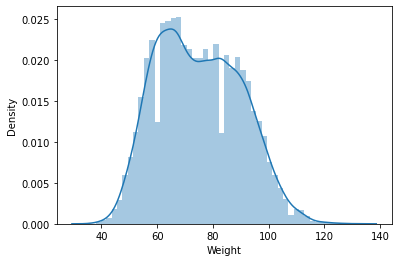

In [30]:
sns.distplot(data['Weight'])

In [31]:
data['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

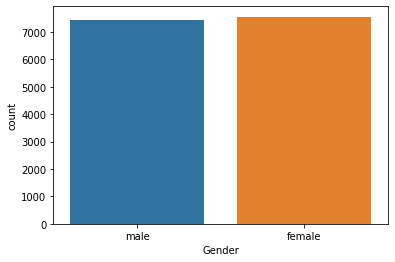

In [32]:
sns.countplot(x='Gender',data=data)

# Combing two dataframes

In [39]:
df=pd.concat([data, data1['Calories']], axis=1)

In [40]:
df.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7,123.0
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5,112.0
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7,143.0
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4,134.0
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2,72.0


# converting into categorical into numerical values

In [47]:
df.replace({'Gender': {'male':0,'female':1}}, inplace=True)

In [48]:
df.head(15)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,1,36,151.0,50.0,23.0,96.0,40.7,123.0
6,19602372,1,33,158.0,56.0,22.0,95.0,40.5,112.0
7,11117088,0,41,175.0,85.0,25.0,100.0,40.7,143.0
8,12132339,0,60,186.0,94.0,21.0,97.0,40.4,134.0
9,17964668,1,26,146.0,51.0,16.0,90.0,40.2,72.0


# splitting the dataset into data and target

In [49]:
X=df.drop(columns='Calories',axis=1)
y=df['Calories']

In [50]:
print(X)

        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0      14733363       0   68   190.0    94.0      29.0       105.0       40.8
1      14861698       1   20   166.0    60.0      14.0        94.0       40.3
2      11179863       0   69   179.0    79.0       5.0        88.0       38.7
3      16180408       1   34   179.0    71.0      13.0       100.0       40.5
4      17771927       1   27   154.0    58.0      10.0        81.0       39.8
...         ...     ...  ...     ...     ...       ...         ...        ...
14995  15644082       1   20   193.0    86.0      11.0        92.0       40.4
14996  17212577       1   27   165.0    65.0       6.0        85.0       39.2
14997  17271188       1   43   159.0    58.0      16.0        90.0       40.1
14998  18643037       0   78   193.0    97.0       2.0        84.0       38.3
14999  11751526       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 8 columns]


In [51]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

In [56]:
print(X.shape,X_train.shape,y_train.shape)

(15000, 8) (10500, 8) (10500,)


In [57]:
model = XGBRegressor()

In [58]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
testing_pred = model.predict(X_test)

In [60]:
print(testing_pred)

[105.69251  78.19758 142.73386 ... 172.60654 117.26567 118.08973]


In [61]:
mae = metrics.mean_absolute_error(y_test,testing_pred)

In [62]:
print(mae)

1.6393732049018144
